In [7]:
"""
Provided code for Application portion of Module 2
"""
# general imports
import urllib2
import random
import time
import math
from collections import deque

In [2]:
############################################
# Provided code

def copy_graph(graph):
    """
    Make a copy of a graph
    """
    new_graph = {}
    for node in graph:
        new_graph[node] = set(graph[node])
    return new_graph

def delete_node(ugraph, node):
    """
    Delete a node from an undirected graph
    """
    neighbors = ugraph[node]
    ugraph.pop(node)
    for neighbor in neighbors:
        ugraph[neighbor].remove(node)

In [3]:
##########################################################
# Code for loading computer network graph

NETWORK_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_rf7.txt"

def load_graph(graph_url):
    """
    Function that loads a graph given the URL
    for a text representation of the graph
    
    Returns a dictionary that models a graph
    """
    graph_file = urllib2.urlopen(graph_url)
    graph_text = graph_file.read()
    graph_lines = graph_text.split('\n')
    graph_lines = graph_lines[ : -1]
    
    print "Loaded graph with", len(graph_lines), "nodes"
    
    answer_graph = {}
    for line in graph_lines:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        answer_graph[node] = set([])
        for neighbor in neighbors[1 : -1]:
            answer_graph[node].add(int(neighbor))

    return answer_graph

In [5]:
#generate random directed graphs with probability p/ ER graph
def ER_graph(length, probability):
    """
    Add edges randomly to create undirected ER graph
    Return a graph
    """
    graph={}
    
    if length == 0:
        return graph
    else:
        for node in range(length):
            graph[node] = set()
        
        for node in range(length):
            for dummy_i in range(length):
                if random.random() < probability and node != dummy_i:
                    graph[node].add(dummy_i)
                    graph[dummy_i].add(node)
                    
    return graph


class UPATrial:
    """
    Simple class to encapsulate optimizated trials for the UPA algorithm
    
    Maintains a list of node numbers with multiple instance of each number.
    The number of instances of each node number are
    in the same proportion as the desired probabilities
    
    Uses random.choice() to select a node number from this list for each trial.
    """

    def __init__(self, num_nodes):
        """
        Initialize a UPATrial object corresponding to a 
        complete graph with num_nodes nodes
        
        Note the initial list of node numbers has num_nodes copies of
        each node number
        """
        self._num_nodes = num_nodes
        self._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]


    def run_trial(self, num_nodes):
        """
        Conduct num_nodes trials using by applying random.choice()
        to the list of node numbers
        
        Updates the list of node numbers so that each node number
        appears in correct ratio
        
        Returns:
        Set of nodes
        """
        # compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for dummy_idx in range(num_nodes):
            new_node_neighbors.add(random.choice(self._node_numbers))
        
        # update the list of node numbers so that each node number 
        # appears in the correct ratio
        self._node_numbers.append(self._num_nodes)
        for dummy_idx in range(len(new_node_neighbors)):
            self._node_numbers.append(self._num_nodes)
        self._node_numbers.extend(list(new_node_neighbors))
        
        #update the number of nodes
        self._num_nodes += 1
        return new_node_neighbors

In [6]:
def make_complete_graph(num_nodes):
    '''
    Returns a dictionary corresponding to
    a complete directed graph with the specified 
    number of nodes
    '''
    graph={}
    if num_nodes==0:
        return graph
    else:
        for node in range(num_nodes):
            edge = [dummy_i for dummy_i in range(num_nodes) \
                    if node != dummy_i]
            graph[node] = set(edge)
        return graph
      
def upa_graph(node_num, m):
    '''
    Generate a full graph using algorithm UPA
    
    node_num: final number of nodes
    m: the existing number of nodes
    '''
    in_graph=make_complete_graph(m)
    dpa=UPATrial(m)
    for dummy_i in range(m, node_num):
        node_list= dpa.run_trial(m)
        in_graph[dummy_i] = node_list
        for node in node_list:
            in_graph[node].add(dummy_i)
            
    return in_graph

In [84]:
"""
Breadth-First Search
"""
def bfs_visited(ugraph,start_node):
    """
    Implement BFS_visited algorithm
    Return a list of visited nodes/ nodes connected with start_node
    """
    a_queue=deque()
    visited=[start_node]
    a_queue.append(start_node)
    
    while len(a_queue) !=0:
        dummy_j=a_queue.pop()
        for node in ugraph[dummy_j]:
            if node not in visited:
                visited.append(node)
                a_queue.append(node)

    return set(visited)

def cc_visited(ugraph):
    """
    Take undirected graph and returns a list of sets,
    each set consists of all the nodes in a connected component
    """
    remains=ugraph.keys()
    cc_part=[]
    
    while remains != []:
        cluster = bfs_visited(ugraph, remains[0])
        for node in cluster:
            remains.remove(node)
        cc_part.append(set(cluster))
        
    return cc_part

def largest_cc_size(ugraph):
    """
    Takes undirected graph
    Returns the size of the largest connected component in the graph
    """
    cc_part = cc_visited(ugraph)
    leng = 0
    for part in cc_part:
        if len(part) > leng:
            leng = len(part)
    
    return leng

def compute_resilience(ugraph, attack_order):
    """
    Takes undirected ugraph, and attack order
    """
    size_list=[largest_cc_size(ugraph)]
    
    for dummy_i in attack_order:
        attacked = ugraph.pop(dummy_i)
        for node in attacked:  
            ugraph[node].remove(dummy_i)
        
        size_list.append(largest_cc_size(ugraph))
    
    return size_list

# Question 1

Dataset has 1239 nodes and 3047 edges. 

1. Determine the probability such that ER graph has about the same number of edges as computer network.
p=0.002
2. Compute an integer m so that the number of edges in the UPA graph is close to the number of edges in comp network.
m=3

In [320]:
test=ER_graph(1239, 0.002)

#count the number of undirected edges of an graph
def count_edge(digraph):
    count=0
    
    for key in digraph:
        for item in digraph[key]:
            if item > key:
                count+=1
    return count 

print count_edge(test)

3115


In [71]:
def random_order(digraph):
    """
    Takes a graph and returns a list of the nodes in the graph in some random order
    """
    node_list=digraph.keys()
    random.shuffle(node_list)
    return node_list

[1, 0, 2]


In [247]:
#create three graphs
computer_network = load_graph(NETWORK_URL)
ER = ER_graph(1239, 0.002)
UPA = upa_graph(1239, 3)

Loaded graph with 1239 nodes


In [107]:
# compute attack-order
cn_attack_order = random_order(computer_network)
er_attack_order = random_order(ER)
upa_attack_order = random_order(UPA)

In [108]:
#Compute resilience of the graph
cn_resilience = compute_resilience(computer_network, attack_order)
er_resilience = compute_resilience(ER, er_attack_order)
upa_resilience = compute_resilience(UPA, upa_attack_order)

In [114]:
print len(upa_resilience)

1240


In [292]:
import matplotlib.pyplot as pldt
import time

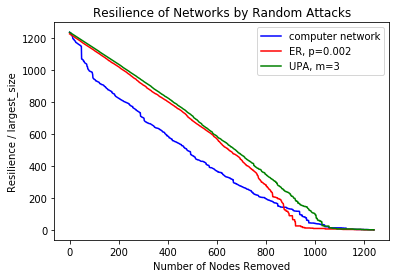

In [307]:
def graph_resilience():
    """
    Plot resilience curve: computer_network, ER graph and UPA
    x-axis is the number of nodes removed
    """
    nodes_removed = range(1240)
    cn = cn_resilience
    er = er_resilience
    upa = upa_resilience

    plt.plot(nodes_removed, cn, '-b', label='computer network')
    plt.plot(nodes_removed, er, '-r', label='ER, p=0.002')
    plt.plot(nodes_removed, upa, '-g', label='UPA, m=3')
    plt.legend(loc='upper right')
    plt.title("Resilience of Networks by Random Attacks")
    plt.xlabel('Number of Nodes Removed')
    plt.ylabel('Resilience / largest_size')
    plt.show()

graph_resilience()

# Question 2

Which of the three graphs are resilient under random attacks as the first 20% of their nodes are removed?
Both the ER and UPA networks are resilient. Computer Network is not very resilient.

# Question 3

In [ ]:
def targeted_order(ugraph):
    """
    Compute a targeted attack order consisting
    of nodes of maximal degree
    
    Returns:
    A list of nodes
    """
    # copy the graph
    new_graph = copy_graph(ugraph)
    
    order = []    
    while len(new_graph) > 0:
        max_degree = -1
        for node in new_graph:
            if len(new_graph[node]) > max_degree:
                max_degree = len(new_graph[node])
                max_degree_node = node
        
        neighbors = new_graph[max_degree_node]
        new_graph.pop(max_degree_node)
        for neighbor in neighbors:
            new_graph[neighbor].remove(max_degree_node)

        order.append(max_degree_node)
    return order

In [290]:
def fast_targeted_order(in_graph):
    """
    A list degree_sets, iterate through degree_sets in the order of descreasing degree;
    Repeatedly choose a node from the set, delete the node from the graph and updates degree_sets properly.
    """
    degree_set=[]
    new_graph = copy_graph(in_graph) 
 
    for key in new_graph:
        degree_set.append(set())      # degree_set[k] is a set of all nodes whose degree is k

    for node in new_graph:
        degree = len(in_graph[node])    # degree is the degree of node i
        degree_set[degree].add(node)

    order_list = []
    graph_length = len(in_graph)

    for dummy_k in range(graph_length-1,-1,-1):       
        while len(degree_set[dummy_k]) != 0:
            max_degree_node = degree_set[dummy_k].pop()
            neighbors = new_graph[max_degree_node]
            for neighbor in neighbors:
                neighbor_degree = len(new_graph[neighbor]) 
                degree_set[neighbor_degree].remove(neighbor)
                degree_set[neighbor_degree -1].add(neighbor)
                new_graph[neighbor].remove(max_degree_node)
            order_list.append(max_degree_node)
            new_graph.pop(max_degree_node)
    
    return order_list

In [303]:
def time_simulation():
    normal = []
    fast = []
    
    for n in range(10, 1000, 10):
        start = time.time()
        targeted_order(upa_graph(n,5))
        end = time.time()
        normal.append(end-start)
    
    for n in range(10, 1000, 10):
        start = time.time()
        fast_targeted_order(upa_graph(n,5))
        end = time.time()
        fast.append(end-start)        
          
    return normal, fast

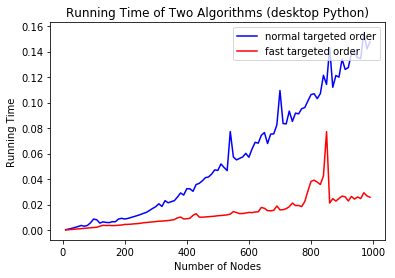

In [310]:
def graph_running_time():
    """
    Plot run_time curve by two different algorithms: UPA
    x-axis is the final number of nodes
    """
    final_num_node = range(10, 1000, 10)
    normal, fast = time_simulation()

    plt.plot(final_num_node, normal, '-b', label='normal targeted order')
    plt.plot(final_num_node, fast, '-r', label='fast targeted order')
    plt.legend(loc='upper right')
    plt.title("Running Time of Two Algorithms (desktop Python)")
    plt.xlabel('Number of Nodes')
    plt.ylabel('Running Time')
    plt.show()

graph_running_time()

What are tight upper bounds on the worst-case running times of the two?
targeted_order: O(n^2)
fast_targeted_order: O(2n)

In [243]:
EX_GRAPH0={0: set([1,2]), 1: set([0]), 2: set([1])}

EX_GRAPH1={0: set([1,4]), 1: set([0, 2]), 2: set([1]),
           3: set([4]), 4: set([3]), 5: set([]),6: set([])}

EX_GRAPH2={0: set([1,4,5]), 1: set([2,6]), 2: set([3,7]),
           3: set([7]), 4: set([1]), 5: set([2]),
           6: set([]), 7: set([3]), 8: set([1,2]), 9: set([0,3,4,5,6,7])}

# Question 4

In [314]:
# using fast_targeted_order to compute a targeted attacked order for each of the three graphs
cn_order = fast_targeted_order(computer_network)
ER_order = fast_targeted_order(ER)
UPA_order = fast_targeted_order(UPA)

In [315]:
# compute the resilience of each of the graph
cn_resilience_fast = compute_resilience(computer_network, cn_order)
er_resilience_fast = compute_resilience(ER, ER_order)
upa_resilience_fast = compute_resilience(UPA, UPA_order)

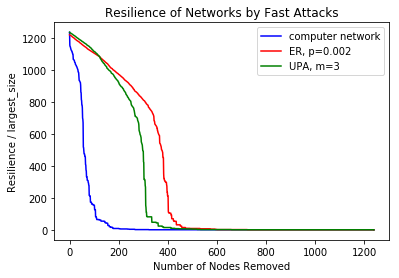

In [317]:
def graph_resilience_fast():
    """
    Plot resilience curve: computer_network, ER graph and UPA
    x-axis is the number of nodes removed
    """
    nodes_removed = range(1240)
    cn = cn_resilience_fast
    er = er_resilience_fast
    upa = upa_resilience_fast

    plt.plot(nodes_removed, cn, '-b', label='computer network')
    plt.plot(nodes_removed, er, '-r', label='ER, p=0.002')
    plt.plot(nodes_removed, upa, '-g', label='UPA, m=3')
    plt.legend(loc='upper right')
    plt.title("Resilience of Networks by Fast Attacks")
    plt.xlabel('Number of Nodes Removed')
    plt.ylabel('Resilience / largest_size')
    plt.show()

graph_resilience_fast()


# Question 5

UPA (m=3) is resilience after the first 20% of nodes removed, point around (240, 960)